# Predicting galaxy redshift from band magnitudes with random forest

Zooey Nguyen

2021-07-08

- 2021-07-16: Update with photoz_metrics and v3 crossmatched data

- 2021-07-20: Update with new photoz_metrics metrics outputs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_metrics import *
from photoz_utils import *

## Setup data

In [2]:
df = import_photoz_data('/data/HSC/HSC_v3/trimmed_forced_forced2_spec_z_matched_online.csv')
df = clean_photoz_data(df)
X_train, X_test, y_train, y_test = split_photoz_data(df)
df

,g_mag,r_mag,i_mag,z_mag,y_mag,zspec
1,21.735455,21.091333,20.344463,20.022955,19.956047,2.18990
2,21.779919,21.001816,20.700275,20.562370,20.465494,0.05522
3,22.846054,21.378252,19.988840,19.455887,19.151213,0.77590
4,22.864800,21.190277,20.361565,19.964561,19.708752,0.44150
5,21.878937,21.425276,21.239027,21.169462,21.168419,0.18440
...,...,...,...,...,...,...
129896,23.842861,23.231312,22.365879,22.095644,22.092629,0.85800
129897,23.074793,22.254620,21.639031,21.444776,21.341650,0.66670
129898,23.593109,22.241854,21.101269,20.645126,20.344555,0.54340
129899,23.615334,22.248329,21.106613,20.645607,20.348583,0.54340


## Train random forest regression

In [3]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 200)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

## Evaluate training point estimates

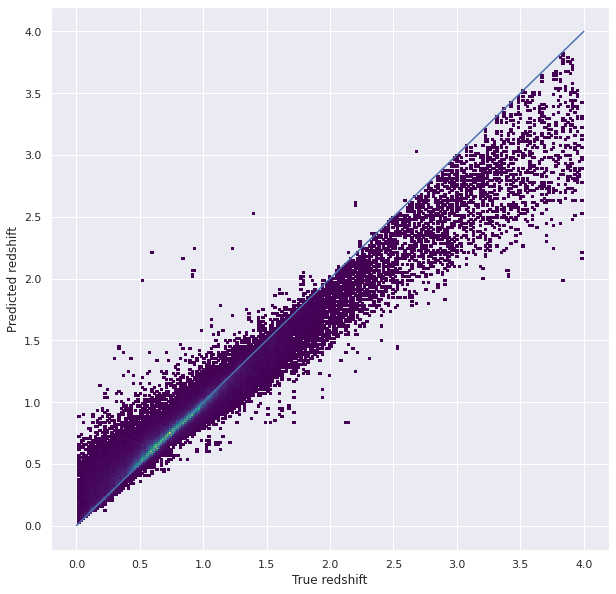

In [4]:
y_train_pred = rf_model.predict(X_train)
y_train_pred = pd.Series(y_train_pred, index=y_train.index)
plot_predictions(y_train_pred, y_train)

In [5]:
metrics_agg = get_point_metrics(y_train_pred, y_train)
metrics_binned = get_point_metrics(y_train_pred, y_train, binned=True)
metrics_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",4685,0.307313,0.071004,0.061500,0.120809,0.089671,0.103522,0.330203
1,"(0.2, 0.4]",7368,0.230635,0.058323,0.053680,0.078309,0.070790,0.100027,0.194625
2,"(0.4, 0.6]",18859,0.079825,0.017638,0.017205,0.028255,0.023910,0.136434,0.034307
3,"(0.6, 0.8]",24517,0.035037,0.006277,0.006091,0.018120,0.014562,0.130359,0.008606
4,"(0.8, 1.0]",19450,0.024406,-0.001017,-0.000754,0.016108,0.012824,0.127404,0.004062
5,"(1.0, 1.2]",9483,0.039270,-0.009285,-0.008488,0.023540,0.018335,0.115681,0.004429
6,"(1.2, 1.4]",4163,0.079775,-0.023930,-0.021483,0.037642,0.031868,0.080711,0.004084
7,"(1.4, 1.6]",2652,0.121830,-0.041528,-0.038377,0.043130,0.042336,0.055053,0.011689
8,"(1.6, 1.8]",1705,0.149994,-0.049956,-0.047871,0.046669,0.047938,0.052199,0.034018
9,"(1.8, 2.0]",1142,0.182019,-0.060108,-0.055549,0.051168,0.052630,0.038529,0.070928


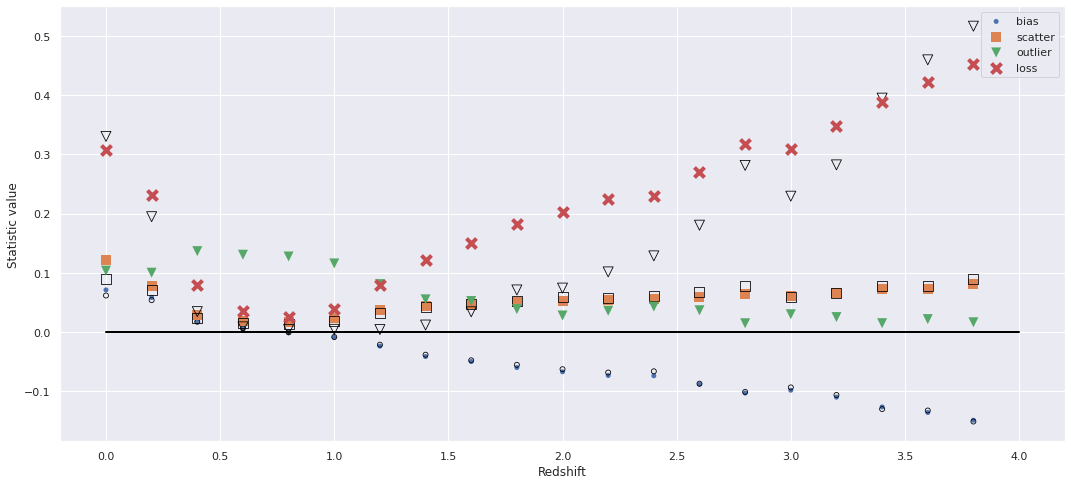

In [6]:
plot_point_metrics(metrics_binned)

## Evaluate training density estimates

In [7]:
predictions = []
for i in range (len(rf_model.estimators_)):
    predictions.append(np.array(rf_model.estimators_[i].predict(X_train)))    
y_train_densities = np.asarray(predictions).T

In [8]:
density_metrics = get_density_metrics(y_train_densities, y_train)

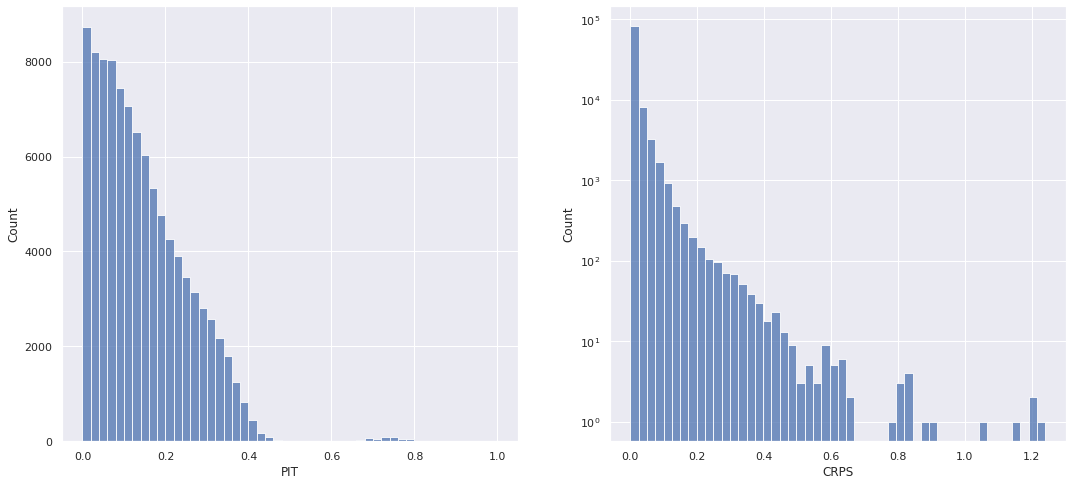

In [9]:
plot_density_metrics(density_metrics)

## Evaluate test point estimates

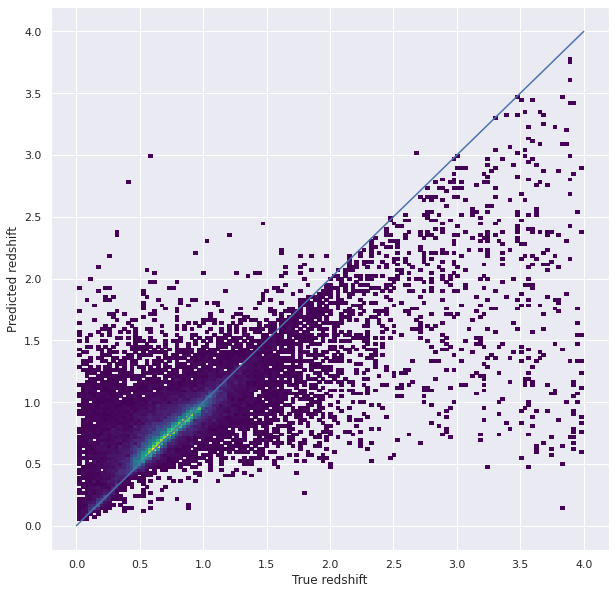

In [10]:
y_test_pred = rf_model.predict(X_test)
y_test_pred = pd.Series(y_test_pred, index=y_test.index)
plot_predictions(y_test_pred, y_test)

In [11]:
metrics_agg = get_point_metrics(y_test_pred, y_test)
metrics_binned = get_point_metrics(y_test_pred, y_test, binned=True)
metrics_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",1154,0.519294,0.254740,0.213356,0.350495,0.304770,0.057192,0.539861
1,"(0.2, 0.4]",1886,0.481166,0.170006,0.154447,0.214488,0.199501,0.092259,0.510604
2,"(0.4, 0.6]",4671,0.235964,0.049629,0.049082,0.074645,0.064436,0.136373,0.195675
3,"(0.6, 0.8]",6170,0.129349,0.018012,0.017938,0.048998,0.039196,0.131767,0.080065
4,"(0.8, 1.0]",4802,0.098373,-0.001883,-0.001433,0.042116,0.032901,0.135985,0.050812
5,"(1.0, 1.2]",2419,0.153696,-0.023703,-0.020782,0.063910,0.048861,0.113270,0.088880
6,"(1.2, 1.4]",1007,0.270036,-0.064283,-0.058089,0.098151,0.086187,0.074479,0.220457
7,"(1.4, 1.6]",630,0.389540,-0.119879,-0.111842,0.122018,0.122272,0.038095,0.396825
8,"(1.6, 1.8]",410,0.402530,-0.126527,-0.116966,0.127303,0.133812,0.048780,0.429268
9,"(1.8, 2.0]",304,0.464525,-0.162876,-0.142900,0.143896,0.155783,0.026316,0.480263


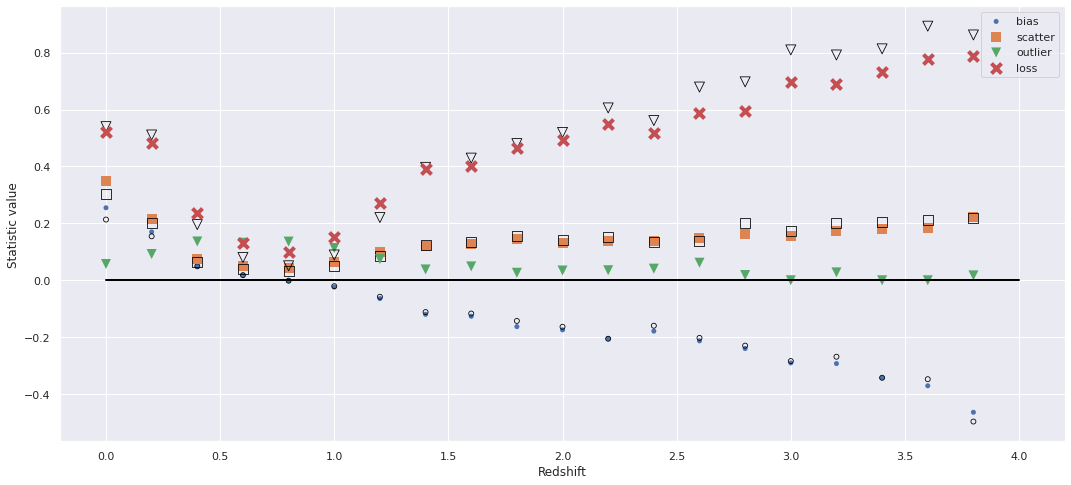

In [12]:
plot_point_metrics(metrics_binned)

## Evaluate test density estimates

In [13]:
predictions = []
for i in range (len(rf_model.estimators_)):
    predictions.append(np.array(rf_model.estimators_[i].predict(X_test)))    
y_test_densities = np.asarray(predictions).T

In [14]:
density_metrics = get_density_metrics(y_test_densities, y_test)

In [15]:
PIT = density_metrics['PIT']
CRPS = density_metrics['CRPS']

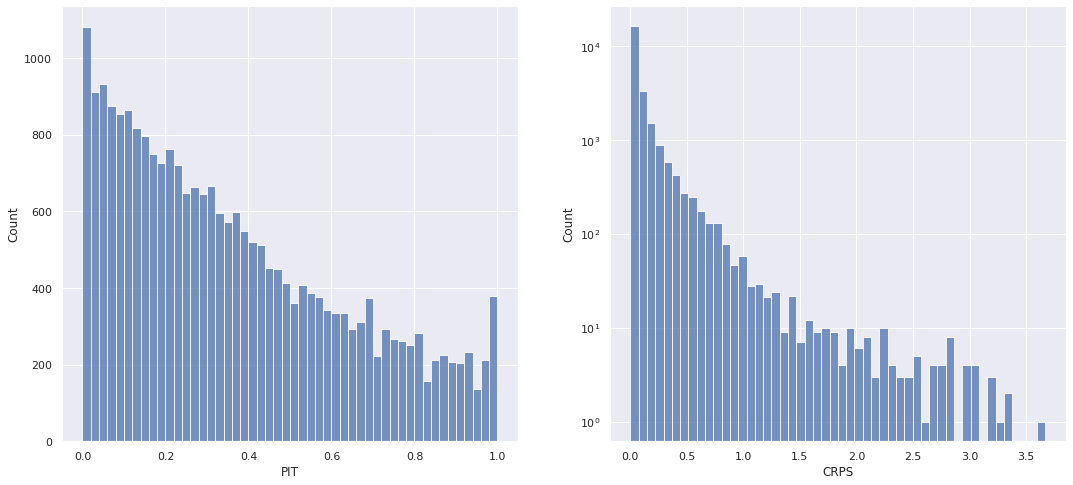

In [16]:
plot_density_metrics(density_metrics)